<a href="https://colab.research.google.com/github/stephmather/Drills/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIDS W207 Group 9 - Final Project

## Colaboratory Notebook Preconditions

**This Colab notebook requires access to a Google Drive.**  Project data is retrieved from a folder on the Google Drive associated with the Google account with which this notebook is executing.

This data folder may exist anywhere beneath the Google Drive.  Unfortunately, mounted Google Drives do not have access to folders and files shared by others.

If the project data files do not reside on the Google Drive of the current Google account, please contact any of the following Group 9 members for assistance:

* Brad Andersen - bdandersen@berkeley.edu
* Stephanie Mather - stephanie.mather@berkeley.edu
* Sonal Thakkar - sonalthakkar@berkeley.edu

In [0]:
import sys
print("Python runtime:", sys.version_info)
assert 3 == sys.version_info.major and 6 == sys.version_info.minor, "Python runtime must be version 3.6.x"

Python runtime: sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


### Identifying the Pathname for Project Resources

This Colab notebook will mount the current user's Google Drive beneath `/content/drive`.   Please specify the pathname of the project resource folder as it is maintained on the current user's Google Drive.

*This is the folder beneath which subfolders **data** and **py** are located.*

In [0]:
gdrive_project_pathname = '/My Drive/MIDS/W207/Final Project'  #@param {type: "string"}

In [0]:
import os.path
from google.colab import drive

# Mount the current user's Google Drive
GOOGLE_DRIVE_MOUNT_POINT = "/content/drive"
print("Mounting Google Drive beneath %s" % GOOGLE_DRIVE_MOUNT_POINT)
drive.mount(GOOGLE_DRIVE_MOUNT_POINT, force_remount = True)

# Build the pathname to the project's folder residing beneath the current user's Google Drive
if not gdrive_project_pathname.startswith("/"):
  gdrive_project_pathname = "/" + gdrive_project_pathname
abs_project_pathname = GOOGLE_DRIVE_MOUNT_POINT + gdrive_project_pathname
print("Project folder: %s" % gdrive_project_pathname)

# Check that the subdirectories anticipated beneath the Google Drive project folder exist
# by checking for the presence of the DO_NOT_DELETE.txt file
for subfolder in ["data", "py"]:
    if not os.path.exists(abs_project_pathname + "/" + subfolder + "/DO_NOT_DELETE.txt"):
        raise FileNotFoundError("Required subfolder '" + subfolder + "' does not exist beneath the Google Drive project folder")
print("Project subfolders successfully verified")

abs_data_pathname = abs_project_pathname + "/data"
abs_py_pathname = abs_project_pathname + "/py"

Mounting Google Drive beneath /content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Project folder: /My Drive/MIDS/W207/Final Project
Project subfolders successfully verified


### Dependencies

In [0]:
import IPython

! pip install -U mne

     |████████████████████████████████| 6.3MB 6.8MB/s 
  Created wheel for mne: filename=mne-0.18.2-cp36-none-any.whl size=6316005 sha256=2433bcf26dccc19d45f4a3adfda9bfdf2e9172af70cfb31c2cf21de54e25bb70
  Stored in directory: /root/.cache/pip/wheels/71/40/30/fb9a9bdeac02c6b3b144be66ac345c5b5587a7d7610564535b
Successfully built mne


In [0]:
# import decimal
# import glob
# import gzip
# import locale
# import os
import pickle
# import re
# import tarfile

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

# import IPython
# import plotly.plotly as py
# import plotly.figure_factory as ff
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# from plotly import tools
# from plotly.graph_objs import Layout, Scatter, Figure, Marker, Scattergl 
# from plotly.graph_objs.layout import YAxis, Annotation, Font
# from plotly.graph_objs.layout.annotation import Font

# from scipy.io import loadmat

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn import preprocessing


# # EEG analysis and visualization (https://martinos.org/mne/stable/index.html)
# import mne
# from mne.datasets import sample
# mne.set_log_level('WARNING')

# # Turicreate for disk-cached data (https://apple.github.io/turicreate)
# # import turicreate as tc

# Add plot inline in the page
%matplotlib inline

In [0]:
sys.path.append(abs_py_pathname)
import data
import eda
import ml_utl

# move to ml_utls

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn import preprocessing


class Baseline_50_50_Model():
  """Baseline model that has no training. Classification is by probability 
  50% chance a clip is 'ictal' or 'interictal'
  50% chance that an 'ictal' clip is 'early ictal'
  
  
  """
  def fit(self, train_data, train_labels):
    return self
  
  
  def predict(self, test_data):
    predicted = np.empty(len(test_data))
    for i in range(len(predicted)):
      guess1 = np.random.rand()
      if guess1 < 0.5:
        predicted[i] = 0.0
      else:
          predicted[i] = 1.0

    return predicted


class Baseline_50_50_Early_Model():
  """Baseline model that has no training. Classification is by probability 
  50% chance a clip is 'ictal' or 'interictal'
  50% chance that an 'ictal' clip is 'early ictal'
  
  
  """
  def fit(self, train_data, train_labels):
    return self
  
  
  def predict(self, test_data):
    predicted = np.empty(len(test_data))
    for i in range(len(predicted)):
      guess1 = np.random.rand()
      if guess1 < 0.5:
        predicted[i] = 0.0
      else:
        guess2 = np.random.rand()
        if guess2 < 0.5:
          predicted[i] = 1.0
        else:
          predicted[i] = 2.0
    return predicted

  
  
def model_score(test_labels, predicted, model_name, verbose = True):
  """Function to score model performance. Prints out Confusion matrix and Classification report
  
  Arguments
  ---------
  test_labels - list or array containing actual labels of the test data. (required) 
  
  predicted - list or array containing predicted labels of the test data. (required)
  
  model_name - string to uniquely identify model for results output (required)

  verbose - Whether to print results in the terminal. (default = True)

  
  Returns
  -------
  model_results_dict - dictionary object containing the confusion matrix and classification report for the model
  """
  
  
  model_classifcation_report = classification_report(test_labels, predicted, output_dict = True)
  conf_matrix = confusion_matrix(test_labels, predicted)
  
  if verbose:
    print('\n', model_name, 'Classification Report\n')
    print(classification_report(test_labels, predicted))
    print('\nConfusion Matrix:\n')
    print(confusion_matrix(test_labels, predicted))
    
  model_results_dict = {model_name : {
  'Model_Classification_Report': model_classifcation_report, 
  'Confusion_Matrix' : conf_matrix
  }}
  
  #saves reults in global results_dict
  results_dict.update(model_results_dict)
    
  return   model_results_dict

### Baseline Model Evaluation

A standard method  for comparing model is required. For this prject the following elements will be used:

* Confusion Matrix
* f1 score for each label
* ROC AUC Score

A Baseline Model has been created through the following assumptions:

* 50% chance a clip is 'ictal' or 'interictal'
* 50% chance that an 'ictal' clip is 'early ictal'

In [0]:
# run to reset results dictionary
results_dict = {}

In [0]:

train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, 2, flattened = True, early_ictal_label = False
)

classifier = Baseline_50_50_Model()
classifier.fit(train_data, train_labels)
predicted = classifier.predict(test_data)
model_results_dict = model_score(test_labels, predicted, 'Baseline_50_50' )


Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_ictal_as_raw_data.pickle
Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_interictal_as_raw_data.pickle
Confirming lengths of data:
- Source of training and test data: 3140
- Training data: (2512, 80000)
- Training labels: 2512
- Test data: (628, 80000)
- Test labels: 628

 Baseline_50_50 Classification Report

              precision    recall  f1-score   support

           0       0.96      0.51      0.66       601
           1       0.04      0.48      0.08        27

    accuracy                           0.50       628
   macro avg       0.50      0.49      0.37       628
weighted avg       0.92      0.50      0.64       628


Confusion Matrix:

[[304 297]
 [ 14  13]]


In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, 2, flattened = True, early_ictal_label = True
)

classifier = Baseline_50_50_Early_Model()
classifier.fit(train_data, train_labels)
predicted = classifier.predict(test_data)
model_results_dict = model_score(test_labels, predicted, 'Baseline_50_50_early_ictal' )


Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_ictal_as_raw_data.pickle
Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_interictal_as_raw_data.pickle
Confirming lengths of data:
- Source of training and test data: 3140
- Training data: (2512, 80000)
- Training labels: 2512
- Test data: (628, 80000)
- Test labels: 628

 Baseline_50_50_early_ictal Classification Report

              precision    recall  f1-score   support

         0.0       0.95      0.49      0.64       601
         1.0       0.04      0.33      0.07        18
         2.0       0.01      0.11      0.01         9

    accuracy                           0.48       628
   macro avg       0.33      0.31      0.24       628
weighted avg       0.91      0.48      0.62       628


Confusion Matrix:

[[292 150 159]
 [ 10   6   2]
 [  6   2   1]]


Brad to add text around bias

## Feature Selection
As the data set is very large, some simple feature selection procedures were trialed on the data set.

The mean, max, min and standard deviation of each one sec clip were extracted and used to train a Gaussain Naive Bayes model. The accuracy scores of 97% seem quite high but are <60% accurate at picking up seizure clips. This may be a result of much greater number of interictal samples than ictal samples, skewing the bias of the model labels.

In [0]:
p2_ictal = data.load_segments( \
      abs_data_pathname, \
      data.SUBJECT_PATIENT, \
      2, \
      data.CLASS_ICTAL, \
      data.as_measurement_data, \
      verbose = True, \
      pickled = True \
    )
p2_interictal = data.load_segments( \
      abs_data_pathname, \
      data.SUBJECT_PATIENT, \
      2, \
      data.CLASS_INTERICTAL, \
      data.as_measurement_data, \
      verbose = True, \
      pickled = True
    )

p2_all = np.concatenate([p2_interictal, p2_ictal], axis = 0)

Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_ictal_as_measurement_data.pickle
Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_interictal_as_measurement_data.pickle


In [0]:
p2_all_measurements = [x[0] for x in p2_all]

p2_all_labels = [0  if m.class_type == 'interictal' else 1 for m in p2_all_measurements ]

train_data, test_data, train_labels, test_labels = train_test_split( 
  p2_all_measurements, p2_all_labels, test_size = 0.2, random_state = 0, shuffle = True 
)

print("Confirming lengths of data:")
print("- Source of training and test data: %d" % len(p2_all_measurements))
print("- Training data: %d" % len(train_data))
print("- Training labels: %d" % len(train_labels))
print("- Test data: %d" % len(test_data))
print("- Test data: %d" % len(test_data))

Confirming lengths of data:
- Source of training and test data: 3141
- Training data: 2512
- Training labels: 2512
- Test data: 629
- Test data: 629


In [0]:
test_data[0].__dict__


{'class_type': 'interictal',
 'max': 78.3185999999987,
 'mean': -1.30385160446167e-12,
 'measures': 5000,
 'min': -67.6814000000013,
 'position': 0,
 'segment_number': 1491,
 'stddev': 35.28143270957119}

###Statistical Features Models


Gaussian Naive Bayes - Mean only
***This will fail!***

Mean values are too close to zero, and Python's floating-point precision isn't capable of handling these numbers.

In [0]:
# classifier = GaussianNB()

# training_means = [[decimal.Decimal(x.mean).ln()] for x in train_data]
# testing_means = [[decimal.Decimal(x.mean).ln()] for x in test_data]

# print(training_means)
# print(testing_means)

# classifier.fit(training_means, train_labels)
# predicted = classifier.predict(testing_means)
# print(classification_report(test_labels, predicted))
# print('Confusion Matrix:'confusion_matrix(test_labels, predicted))

Gaussian Naive Bayes - Minimum feature only

In [0]:
# Using the common library for prediction:
classifier = GaussianNB()
training_mins = [[x.min] for x in train_data]
testing_mins = [[x.min] for x in test_data]
predicted = ml_utl.nb_predict(classifier,training_mins,train_labels, testing_mins, test_labels)

model_results_dict = model_score(test_labels, predicted, 'GaussianNB_x.min')




              precision    recall  f1-score   support

           0       0.97      0.98      0.98       600
           1       0.50      0.31      0.38        29

    accuracy                           0.95       629
   macro avg       0.73      0.65      0.68       629
weighted avg       0.95      0.95      0.95       629

[[591   9]
 [ 20   9]]

 GaussianNB_x.min Classification Report

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       600
           1       0.50      0.31      0.38        29

    accuracy                           0.95       629
   macro avg       0.73      0.65      0.68       629
weighted avg       0.95      0.95      0.95       629


Confusion Matrix:

[[591   9]
 [ 20   9]]


In [0]:
classifier = GaussianNB()

training_maxs = [[x.max] for x in train_data]
testing_maxs = [[x.max] for x in test_data]

predicted = ml_utl.nb_predict(classifier,training_maxs,train_labels, testing_maxs, test_labels)
model_results_dict = model_score(test_labels, predicted, 'GaussianNB_x.max')


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       600
           1       0.52      0.41      0.46        29

    accuracy                           0.96       629
   macro avg       0.75      0.70      0.72       629
weighted avg       0.95      0.96      0.95       629

[[589  11]
 [ 17  12]]

 GaussianNB_x.max Classification Report

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       600
           1       0.52      0.41      0.46        29

    accuracy                           0.96       629
   macro avg       0.75      0.70      0.72       629
weighted avg       0.95      0.96      0.95       629


Confusion Matrix:

[[589  11]
 [ 17  12]]


In [0]:
classifier = GaussianNB()

training_stddevs =  [[x.stddev] for x in train_data]
testing_stddevs = [[x.stddev] for x in test_data] 

predicted = ml_utl.nb_predict(classifier,training_stddevs,train_labels, testing_stddevs, test_labels)
model_results_dict = model_score(test_labels, predicted, 'GaussianNB_x.stdev')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       600
           1       0.56      0.34      0.43        29

    accuracy                           0.96       629
   macro avg       0.76      0.67      0.70       629
weighted avg       0.95      0.96      0.95       629

[[592   8]
 [ 19  10]]

 GaussianNB_x.stdev Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       600
           1       0.56      0.34      0.43        29

    accuracy                           0.96       629
   macro avg       0.76      0.67      0.70       629
weighted avg       0.95      0.96      0.95       629


Confusion Matrix:

[[592   8]
 [ 19  10]]


Gaussian Naive Bayes - stddev, max, min features

In [0]:
training_measures = [[x.stddev, x.max, x.min] for x in train_data]
testing_measures = [[x.stddev, x.max, x.min] for x in test_data]

predicted = ml_utl.nb_predict(classifier,training_measures,train_labels, testing_measures, test_labels)
model_results_dict = model_score(test_labels, predicted, 'GaussianNB_x.min.max.std')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       600
           1       0.43      0.52      0.47        29

    accuracy                           0.95       629
   macro avg       0.70      0.74      0.72       629
weighted avg       0.95      0.95      0.95       629

[[580  20]
 [ 14  15]]

 GaussianNB_x.min.max.std Classification Report

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       600
           1       0.43      0.52      0.47        29

    accuracy                           0.95       629
   macro avg       0.70      0.74      0.72       629
weighted avg       0.95      0.95      0.95       629


Confusion Matrix:

[[580  20]
 [ 14  15]]


In [0]:
training_measures = [[x.stddev, x.max, x.min] for x in train_data]
testing_measures = [[x.stddev, x.max, x.min] for x in test_data]

classifier.fit(training_measures, train_labels)
predicted = classifier.predict(testing_measures)
print(classification_report(test_labels, predicted))
print(confusion_matrix(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       600
           1       0.43      0.52      0.47        29

    accuracy                           0.95       629
   macro avg       0.70      0.74      0.72       629
weighted avg       0.95      0.95      0.95       629

[[580  20]
 [ 14  15]]


In [0]:
print(classifier.theta_)
print(classifier.sigma_)

[[  45.84110515  100.77865289 -104.29624251]
 [ 170.34183228  454.66306885 -505.08283279]]
[[  2363.85365271   6872.65210313   9946.5444311 ]
 [  4193.17232083  41686.69847436 104052.68227339]]


Look into sigma/theta

#### Improve Gaussian Naive Bayes through hyperparameter tuning

In [0]:
def GridSearch_Model(hyperprmtrs, model):


  ## Grid search classifier 
  gridsearch = GridSearchCV(model, hyperprmtrs, cv=3)
  gridsearch.fit(training_measures, train_labels)
  grid_predict = gridsearch.predict(testing_measures)

  #report accuracy
  accuracy = classification_report(grid_predict, test_labels)
  modelscore = gridsearch.score(testing_measures, test_labels)
  print ("Accuracy of the classifier: %.3f\n\n %s" %(modelscore, accuracy))
  print(confusion_matrix(test_labels, grid_predict))

  return gridsearch


hyperprmtrs = {'var_smoothing': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 4, 10]}
nb = GridSearch_Model(hyperprmtrs, GaussianNB())


Accuracy of the classifier: 0.965

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       614
           1       0.38      0.73      0.50        15

    accuracy                           0.97       629
   macro avg       0.69      0.85      0.74       629
weighted avg       0.98      0.97      0.97       629

[[596   4]
 [ 18  11]]


Accuracy gain of 2% points by using var_smooting value of 1. However there are actually less seizures correctly classified so it is recommendded that var_smoothing is left at the defult value of 1e-9.

In [0]:
np.set_printoptions(precision=3)
print (nb.best_params_)
print (hyperprmtrs)
print (nb.cv_results_['mean_test_score'])

{'var_smoothing': 1}
{'var_smoothing': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 4, 10]}
[0.953 0.953 0.953 0.953 0.953 0.955 0.964 0.959 0.951]


The accuracy of the model using the extracted features of max, min and standard deviation of each one sec clip were extracted and used to train a Gaussain Naive Bayes model. This approach performs poorly on the ictal data with >50% f1_score. 

This may be a result of much greater number of interictal samples than ictal samples, skewing the bias of the model labels. This was corrected in the next iteration of the model to try and improve the accuracy.

### Regression Model

In [0]:
#Try Logistic Regression
from sklearn.linear_model import LogisticRegression
# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics

training_measures = [[x.stddev, x.max, x.min] for x in train_data]
testing_measures = [[x.stddev, x.max, x.min] for x in test_data]

lgr = LogisticRegression()
lgr.fit(training_measures, train_labels)
lgr_predictions = lgr.predict(testing_measures)

f1Score = metrics.f1_score(test_labels,lgr_predictions,average='weighted')
#f1score.append(f1Score)
print("F1-score: %3.4f" %(f1Score))


model_results_dict = model_score(test_labels, lgr_predictions, 'LogisticRegression')

F1-score: 0.9597

 LogisticRegression Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       600
           1       0.73      0.38      0.50        29

    accuracy                           0.97       629
   macro avg       0.85      0.69      0.74       629
weighted avg       0.96      0.97      0.96       629


Confusion Matrix:

[[596   4]
 [ 18  11]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



## Balancing Training data: ictal versus interictal

Using the Gaussian Naive Bayes - stddev, max, min features model we varied the proportion of ictal versus interictal data in the training data. 

Text(0, 0.5, 'f1 score or accuracy')

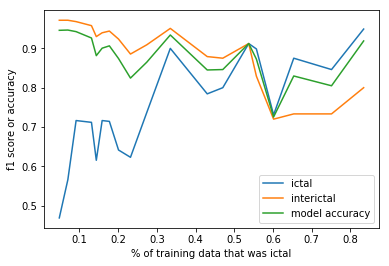

In [0]:
ratios = []
ictal_f1s = []
interictal_f1s = []
accuracies = []

for ii in [30, 50, 80, 100, 120, 130,  170, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000]:

  p2_balanced = np.concatenate([p2_interictal[:ii], p2_ictal], axis = 0)

  ratio = len(p2_ictal)/(len(p2_interictal[:ii])+len(p2_ictal))

  p2_all_measurements = [x[0] for x in p2_balanced]

  p2_all_labels = [m.class_type for m in p2_all_measurements]

  train_data, test_data, train_labels, test_labels = train_test_split( \
    p2_all_measurements, p2_all_labels, test_size = 0.2, random_state = 0, shuffle = True \
  )


  training_measures = [[x.stddev, x.max, x.min] for x in train_data]
  testing_measures = [[x.stddev, x.max, x.min] for x in test_data]
  
  classifier = GaussianNB()
  classifier.fit(training_measures, train_labels)
  predicted = classifier.predict(testing_measures)
  interictal_f1 = f1_score(test_labels, predicted, average = 'binary', pos_label = 'interictal')
  ictal_f1 = f1_score(test_labels, predicted, average = 'binary', pos_label = 'ictal')
  accuracy = accuracy_score(test_labels, predicted)
#   print(classification_report(test_labels, predicted))
  
  ratios.append(ratio)
  ictal_f1s.append(ictal_f1)
  interictal_f1s.append(interictal_f1)
  accuracies.append(accuracy)
  
plt.plot(ratios, ictal_f1s, label = 'ictal')
plt.plot(ratios, interictal_f1s, label = 'interictal')
plt.plot(ratios, accuracies, label = 'model accuracy')
plt.legend()
plt.xlabel('% of training data that was ictal')
plt.ylabel('f1 score or accuracy')

It is evident that the skewed ratio of training data is having an effect on the Gaussian Model accuracy. As the ratio becomes closer to 2:1 interictal:ictal data the accuracy for the ictal data improves. Beyond this the performance becomes unstable whichi may be reflective of too little training data.

### Create more ictal data to improve model performance

In [0]:
### add some code here and re-run Gaussian

### Dimensionality Reduction with PCA
add some code to try dimensionality reduction as well as some visulisation of both the data clusters and the %variance caputred as N increases. Similar to Q2 and 3 in Project 3

PCA on 2 label dataset

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, 2, flattened = True
)

Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_ictal_as_raw_data.pickle
Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_interictal_as_raw_data.pickle
Confirming lengths of data:
- Source of training and test data: 3140
- Training data: (2512, 80000)
- Training labels: 2512
- Test data: (628, 80000)
- Test labels: 628


(124, 2)
(2388, 2)


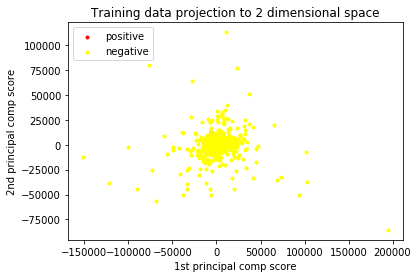

(27, 2)
(601, 2)


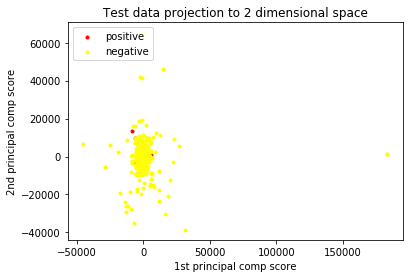

In [0]:
def scatter_fit(data_set, data_labels, title_text):
    pca = PCA(n_components=2)
    data_2D = pca.fit_transform(data_set)
  
    
    positive_pca = data_2D[data_labels == 1]
    print(positive_pca.shape)
    negative_pca = data_2D[data_labels == 0]
    print(negative_pca.shape)
    positive = plt.scatter(positive_pca[:, 0], positive_pca[:, 1],facecolor='red',marker=".")
    negative = plt.scatter(negative_pca[:, 0], negative_pca[:, 1],facecolor='yellow',marker=".")
    # Plot legends for scatterplot
    plt.legend((positive,negative),
           ('positive', 'negative'),
           scatterpoints=1,
           loc='upper left')
    plt.xlabel("1st principal comp score")
    plt.ylabel('2nd principal comp score')
    plt.title("{} data projection to 2 dimensional space".format(title_text))
    plt.show()
    
scatter_fit(train_data, train_labels, 'Training')
scatter_fit(test_data, test_labels, 'Test')

In [0]:
def explained_variance(train_data, ks):

  explained_var = []
  k_list = []
  for k in ks:
    n_comp = k
    pca_mod = PCA(n_components = n_comp)
    pca_mod.fit(train_data)
    
    k_list.append(n_comp)
    explained_var.append(sum(pca_mod.explained_variance_ratio_))
    
    
    print('k: ', k,'-- Explained variance ratio:', sum(pca_mod.explained_variance_ratio_) )
                         
  plt.scatter(x=k_list, y = explained_var)

  
  
# get full raw data set, flattened  only ictal, interictal labels
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 2, reduced_set = False, early_ictal_label = False, flattened = True
)

#list of k-dimensions for PCA
ks=[5,10,50,100, 150, 200, 400, 600, 800, 1000]

explained_variance(train_data, ks)

Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_ictal_as_raw_data.pickle
Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_interictal_as_raw_data.pickle
Confirming lengths of data:
- Source of training and test data: 3140
- Training data: (2512, 80000)
- Training labels: 2512
- Test data: (628, 80000)
- Test labels: 628
k:  5 -- Explained variance ratio: 0.5471602621088042
k:  10 -- Explained variance ratio: 0.6646673327326127
k:  50 -- Explained variance ratio: 0.8790929138163547
k:  100 -- Explained variance ratio: 0.9425939951489466
k:  150 -- Explained variance ratio: 0.9666700467898147


KeyboardInterrupt: ignored

Try GaussiannNB with PCA

In [0]:
k=600
  
model_pipeline=Pipeline([('compression',  PCA(n_components = k)), 
                        ('classifier', 
                         GaussianNB())])


model_pipeline.fit(train_data, train_labels)



In [0]:
predicted = model_pipeline.predict(test_data)


model_results_dict = model_score(test_labels, predicted, 'PCA_600_GaussianNB' )

Try RandomForrestRegressor

In [0]:
## warning slow to train --uncomment to run


k=600
  
model_pipeline=Pipeline([('compression',  PCA(n_components = k)), 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])
  
model_pipeline.fit(train_data,train_labels)
  
print('train complete!')
predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)  


model_results_dict = model_score(test_labels, predicted, 'PCA_600_RandForestReg' )

# save the model to disk
filename = 'PCA_600_RandForestReg.sav'
pickle.dump(model_pipeline, open(filename, 'wb'))

Steph =- Add confusion matrix and classification report (use ml_utl.assign_predicted_labels())

PCA on 3 label dataset

In [0]:


## warning slow to train --uncomment to run

get full raw data set, flattened , early ictal, ictal and interictal labels
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 2, reduced_set = False, early_ictal_label = False, flattened = True
)

k=600
  
model_pipeline=Pipeline([('compression',  PCA(n_components = k)), 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])
  
model_pipeline.fit(train_data,train_labels)
  
print('train complete!')
predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels) 

model_results_dict = model_score(test_labels, predicted, 'PCA_600_RandForestReg_early_ict' )

# save the model to disk
filename = 'PCA_600_RandForestReg_early_ict.sav'
pickle.dump(model_pipeline, open(filename, 'wb'))

Steph =- Add confusion matrix and classification report (use ml_utl.assign_predicted_labels())

## Michael Hills Winning Submission

##### Code

In [0]:
## MichaelHills/seizure-detection

## Customised by StephMather as noted

import numpy as np
from scipy import signal
from scipy.signal import resample, hann
from sklearn import preprocessing



# NOTE(mike): All transforms take in data of the shape (NUM_CHANNELS, NUM_FEATURES)
# Although some have been written work on the last axis and may work on any-dimension data.


class FFT:
    """
    Apply Fast Fourier Transform to the last axis.
    """
    def get_name(self):
        return "fft"

    def apply(self, data):
        axis = data.ndim - 1
        return np.fft.rfft(data, axis=axis)


class Slice:
    """
    Customised by StephMather
    
    Take a slice of the data on the last axis.
    e.g. Slice(1, 48) works like a normal python slice, that is 1-47 will be taken
    """
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def get_name(self):
        return "slice%d-%d" % (self.start, self.end)

    def apply(self, data):
        s = [slice(None),] * data.ndim
        s[-1] = slice(self.start, self.end)
        s= tuple(s) # new line for future compatibility warning
        return data[s]
      
      

class LPF:
    """
    Low-pass filter using FIR window
    """
    def __init__(self, f):
        self.f = f

    def get_name(self):
        return 'lpf%d' % self.f

    def apply(self, data):
        nyq = self.f / 2.0
        cutoff = min(self.f, nyq-1)
        h = signal.firwin(numtaps=101, cutoff=cutoff, nyq=nyq)

        # data[i][ch][dim0]
        for i in range(len(data)):
            data_point = data[i]
            for j in range(len(data_point)):
                data_point[j] = signal.lfilter(h, 1.0, data_point[j])

        return data


class MFCC:
    """
    Mel-frequency cepstrum coefficients
    """
    def get_name(self):
        return "mfcc"

    def apply(self, data):
        all_ceps = []
        for ch in data:
            ceps, mspec, spec = mfcc(ch)
            all_ceps.append(ceps.ravel())

        return np.array(all_ceps)


class Magnitude:
    """
    Take magnitudes of Complex data
    """
    def get_name(self):
        return "mag"

    def apply(self, data):
        return np.absolute(data)


class MagnitudeAndPhase:
    """
    Take the magnitudes and phases of complex data and append them together.
    """
    def get_name(self):
        return "magphase"

    def apply(self, data):
        magnitudes = np.absolute(data)
        phases = np.angle(data)
        return np.concatenate((magnitudes, phases), axis=1)


class Log10:
    """
    Apply Log10
    """
    def get_name(self):
        return "log10"

    def apply(self, data):
        # 10.0 * log10(re * re + im * im)
        indices = np.where(data <= 0)
        data[indices] = np.max(data)
        data[indices] = (np.min(data) * 0.1)
        return np.log10(data)



class Resample:
    """
    Resample time-series data.
    """
    def __init__(self, sample_rate):
        self.f = sample_rate

    def get_name(self):
        return "resample%d" % self.f

    def apply(self, data):
        axis = data.ndim - 1
        if data.shape[-1] > self.f:
            return resample(data, self.f, axis=axis)
        return data


class ResampleHanning:
    """
    Resample time-series data using a Hanning window
    """
    def __init__(self, sample_rate):
        self.f = sample_rate

    def get_name(self):
        return "resample%dhanning" % self.f

    def apply(self, data):
        axis = data.ndim - 1
        out = resample(data, self.f, axis=axis, window=hann(M=data.shape[axis]))
        return out


class DaubWaveletStats:
    """
    Daubechies wavelet coefficients. For each block of co-efficients
    take (mean, std, min, max)
    """
    def __init__(self, n):
        self.n = n

    def get_name(self):
        return "dwtdb%dstats" % self.n

    def apply(self, data):
        # data[ch][dim0]
        shape = data.shape
        out = np.empty((shape[0], 4 * (self.n * 2 + 1)), dtype=np.float64)

        def set_stats(outi, x, offset):
            outi[offset*4] = np.mean(x)
            outi[offset*4+1] = np.std(x)
            outi[offset*4+2] = np.min(x)
            outi[offset*4+3] = np.max(x)

        for i in range(len(data)):
            outi = out[i]
            new_data = pywt.wavedec(data[i], 'db%d' % self.n, level=self.n*2)
            for i, x in enumerate(new_data):
                set_stats(outi, x, i)

        return out


class UnitScale:
    """
    Scale across the last axis.
    """
    def get_name(self):
        return 'unit-scale'

    def apply(self, data):
        return preprocessing.scale(data, axis=data.ndim-1)


class UnitScaleFeat:
    """
    Scale across the first axis, i.e. scale each feature.
    """
    def get_name(self):
        return 'unit-scale-feat'

    def apply(self, data):
        return preprocessing.scale(data, axis=0)


class CorrelationMatrix:
    """
    Calculate correlation coefficients matrix across all EEG channels.
    """
    def get_name(self):
        return 'corr-mat'

    def apply(self, data):
        return np.corrcoef(data)


class Eigenvalues:
    """
    Take eigenvalues of a matrix, and sort them by magnitude in order to
    make them useful as features (as they have no inherent order).
    """
    def get_name(self):
        return 'eigenvalues'

    def apply(self, data):
        w, v = np.linalg.eig(data)
        w = np.absolute(w)
        w.sort()
        return w


# Take the upper right triangle of a matrix
def upper_right_triangle(matrix):
    accum = []
    for i in range(matrix.shape[0]):
        for j in range(i+1, matrix.shape[1]):
            accum.append(matrix[i, j])

    return np.array(accum)




class FreqCorrelation:
    """
    Correlation in the frequency domain. First take FFT with (start, end) slice options,
    then calculate correlation co-efficients on the FFT output, followed by calculating
    eigenvalues on the correlation co-efficients matrix.
    The output features are (fft, upper_right_diagonal(correlation_coefficients), eigenvalues)
    Features can be selected/omitted using the constructor arguments.
    """
    def __init__(self, start, end, scale_option, with_fft=False, with_corr=True, with_eigen=True):
        self.start = start
        self.end = end
        self.scale_option = scale_option
        self.with_fft = with_fft
        self.with_corr = with_corr
        self.with_eigen = with_eigen
        assert scale_option in ('us', 'usf', 'none')
        assert with_corr or with_eigen

    def get_name(self):
        selections = []
        if not self.with_corr:
            selections.append('nocorr')
        if not self.with_eigen:
            selections.append('noeig')
        if len(selections) > 0:
            selection_str = '-' + '-'.join(selections)
        else:
            selection_str = ''
        return 'freq-correlation-%d-%d-%s-%s%s' % (self.start, self.end, 'withfft' if self.with_fft else 'nofft',
                                                   self.scale_option, selection_str)

    def apply(self, data):
        data1 = FFT().apply(data)
        data1 = Slice(self.start, self.end).apply(data1)
        data1 = Magnitude().apply(data1)
        data1 = Log10().apply(data1)

        data2 = data1
        if self.scale_option == 'usf':
            data2 = UnitScaleFeat().apply(data2)
        elif self.scale_option == 'us':
            data2 = UnitScale().apply(data2)

        data2 = CorrelationMatrix().apply(data2)

        if self.with_eigen:
            w = Eigenvalues().apply(data2)

        out = []
        if self.with_corr:
            data2 = upper_right_triangle(data2)
            out.append(data2)
        if self.with_eigen:
            out.append(w)
        if self.with_fft:
            data1 = data1.ravel()
            out.append(data1)
        for d in out:
            assert d.ndim == 1

        return np.concatenate(out, axis=0)


class TimeCorrelation:
    """
    Correlation in the time domain. First downsample the data, then calculate correlation co-efficients
    followed by calculating eigenvalues on the correlation co-efficients matrix.
    The output features are (upper_right_diagonal(correlation_coefficients), eigenvalues)
    Features can be selected/omitted using the constructor arguments.
    """
    def __init__(self, max_hz, scale_option, with_corr=True, with_eigen=True):
        self.max_hz = max_hz
        self.scale_option = scale_option
        self.with_corr = with_corr
        self.with_eigen = with_eigen
        assert scale_option in ('us', 'usf', 'none')
        assert with_corr or with_eigen

    def get_name(self):
        selections = []
        if not self.with_corr:
            selections.append('nocorr')
        if not self.with_eigen:
            selections.append('noeig')
        if len(selections) > 0:
            selection_str = '-' + '-'.join(selections)
        else:
            selection_str = ''
        return 'time-correlation-r%d-%s%s' % (self.max_hz, self.scale_option, selection_str)

    def apply(self, data):
        # so that correlation matrix calculation doesn't crash
        for ch in data:
            if np.alltrue(ch == 0.0):
                ch[-1] += 0.00001

        data1 = data
        if data1.shape[1] > self.max_hz:
            data1 = Resample(self.max_hz).apply(data1)

        if self.scale_option == 'usf':
            data1 = UnitScaleFeat().apply(data1)
        elif self.scale_option == 'us':
            data1 = UnitScale().apply(data1)

        data1 = CorrelationMatrix().apply(data1)

        if self.with_eigen:
            w = Eigenvalues().apply(data1)

        out = []
        if self.with_corr:
            data1 = upper_right_triangle(data1)
            out.append(data1)
        if self.with_eigen:
            out.append(w)

        for d in out:
            assert d.ndim == 1

        return np.concatenate(out, axis=0)



class FFTWithTimeFreqCorrelation:
    """
    Customised by StephMather
    
    
    Combines FFT with time and frequency correlation, taking both correlation coefficients and eigenvalues.
    """
    def __init__(self, start, end, max_hz, scale_option):
        self.start = start
        self.end = end
        self.max_hz = max_hz
        self.scale_option = scale_option

    def get_name(self):
        return 'fft-with-time-freq-corr-%d-%d-r%d-%s' % (self.start, self.end, self.max_hz, self.scale_option)
      
    def fit(self, X, y = None): # created by Stephanie Mather for Pipeline compatibility
      return self

    def transform(self, data):  # renamed to transform for Pipeline compatibility and modified
#       transformed_data = np.empty((data.shape[0],1024))
      for i in range(data.shape[0]):
        
        data1 = TimeCorrelation(self.max_hz, self.scale_option).apply(data[i])
        data2 = FreqCorrelation(self.start, self.end, self.scale_option, with_fft=True).apply(data[i])
        assert data1.ndim == data2.ndim
        xi = np.concatenate((data1, data2), axis=data1.ndim-1)
        
        if i == 0:
          transformed_data = np.empty((data.shape[0],xi.shape[0]))
#         print(xi)
        transformed_data[i] = xi
      return transformed_data



##### Analysis


In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 2, reduced_set = False, early_ictal_label = False, flattened = False
)

Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_ictal_as_raw_data.pickle
Loading pickled segment data: /content/drive/My Drive/MIDS/W207/Final Project/data/pickled/Patient_2_interictal_as_raw_data.pickle
Confirming lengths of data:
- Source of training and test data: 3140
- Training data: (2512, 16, 5000)
- Training labels: 2512
- Test data: (628, 16, 5000)
- Test labels: 628


train complete!

 FFT_GaussianNB Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       601
           1       0.53      0.89      0.67        27

    accuracy                           0.96       628
   macro avg       0.76      0.93      0.82       628
weighted avg       0.98      0.96      0.97       628


Confusion Matrix:

[[580  21]
 [  3  24]]


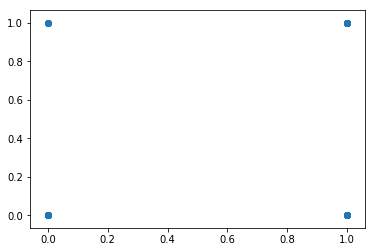

In [0]:

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         GaussianNB())])


model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)


model_results_dict = model_score(test_labels, predicted, 'FFT_GaussianNB' )

# save the model to disk
filename = 'FFT_GaussianNB.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

train complete!


ValueError: ignored

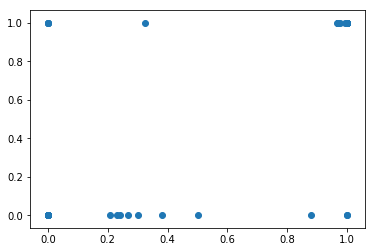

In [0]:
# warning slow - uncomment to run
model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])


model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)

# Apply labels

predicted_label = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted, 'FFT_RandForestReg' )

# save the model to disk
filename = 'FFT_RandForestReg.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

#### Michael Hills with Reduced Training Set

From the work done with the Gaussian Model it was determined that a 2:1 interictal to ictal ratio of training results gave superior results over using the whole training set. This approach was applied to the FFT preprocessed data. 



In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 2, reduced_set = True, early_ictal_label = True, flattened = False
)

In [0]:
model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

In [0]:
predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))


##### Test on all patients

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 1, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p1' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red_p1.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))


In [0]:
## warning - slow, uncomment to run


train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 3, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p3' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red_p3.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 4, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p4' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red_p4.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 5, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p5' )


# save the model to disk
filename = 'FFT_RandForestReg_early_red_p5.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 6, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p6' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red_p6.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 7, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)


model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p7' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red_p7.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

In [0]:
train_data, test_data, train_labels, test_labels = ml_utl.get_raw_train_test_split(
    abs_data_pathname, data.SUBJECT_PATIENT, subject_number = 8, reduced_set = True, early_ictal_label = True, flattened = False
)

model_pipeline=Pipeline([('compression',  FFTWithTimeFreqCorrelation(1, 48, 400, 'usf'))
                        , 
                        ('classifier', 
                         RandomForestRegressor(n_estimators=3000,
                                               min_samples_split=2, 
                                               bootstrap=False, 
                                               n_jobs=4, 
                                               random_state=0))])

model_pipeline.fit(train_data, train_labels)

print('train complete!')

predicted = model_pipeline.predict(test_data)
plt.scatter(predicted, test_labels)
   
# Apply labels

predicted_labels = ml_utl.assign_predicted_labels(predicted)

model_results_dict = model_score(test_labels, predicted_labels, 'FFT_RandForestReg_early_red_p8' )

# save the model to disk
filename = 'FFT_RandForestReg_early_red_p8.sav'
pickle.dump(model_pipeline, open(abs_data_pathname+ '/pickled/' + filename, 'wb'))

## Compare Models


In [0]:
print('{: <30} {: <15} {: <15} {: <21} {: <21} {: <21} '.format('Model Name', 'Accuracy','Custom Score', 'interictal', 'ictal', 'early ictal'))
print('{: <30} {: <15} {: <15} {: <7}{: <7}{: <7} {: <7}{: <7}{: <7} {: <7}{: <7}{: <7}  '.format('', '', '', 'prec.', 'recl', 'f1', 'prec.', 'recl', 'f1', 'prec.', 'recl', 'f1'))
for model in results_dict.keys():
  print('{: <30} '.format(model), end = '')
  print(' {: <15}'.format(round(results_dict[model]['Model_Classification_Report']['accuracy']*100,2)), end = '')
  print(' {: <15}'.format('TBA'),end = '')
  for label in results_dict[model]['Model_Classification_Report'].keys():
    try :
      int(float(label))
      for score in ['precision', 'recall', 'f1-score']:
        print('{: <7}' .format(round(results_dict[model]['Model_Classification_Report'][label][score]*100,2)), end = '')
      print(' ', end = '')
    except:
      continue
  
  print('')

In [0]:
results_dict[model]['Model_Classification_Report'].keys()

for label in results_dict[model]['Model_Classification_Report'].keys():
  if label.isnumeric():
    print(results_dict[model]['Model_Classification_Report'][key])

In [0]:
results_dict['Baseline_50_50_early_ictal']['Model_Classification_Report'].keys()

for label in results_dict['Baseline_50_50_early_ictal']['Model_Classification_Report'].keys():
  
  try :
    int(float(label))
    print(results_dict[model]['Model_Classification_Report'][label])
  except:
    continue

## Evaluate Errors

## Evaluate Final Model in kaggle Leaderboard.

Separate Notebook

Possible improvements:





Maybe some chat about
* need for accuracy. if implementing using technology such as https://www.neuropace.com/
* need for speed. model can't take longer than 1 sec to predict a clip if it is to operate in real time